In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\reddy\Downloads\Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Cleaning

In [4]:
data1 = df.copy()
data1.TotalCharges = pd.to_numeric(data1.TotalCharges, errors='coerce')
data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
data1.loc[data1 ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
data1.TotalCharges = data1.TotalCharges.fillna(data1.TotalCharges.interpolate())
#data1 for having tenure values instead of groups

In [15]:
print(data1['tenure'].max())
data = data1.copy()

72


In [9]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data1['tenure_group'] = pd.cut(data1.tenure, range(1, 80, 12), right=False, labels=labels)

In [10]:
data1['tenure_group'].value_counts()
#data.head(5)

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [65]:
#exploration

C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\1451974358.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = data1.Churn, y = data1.tenure, palette='bwr')


<Axes: xlabel='Churn', ylabel='tenure'>

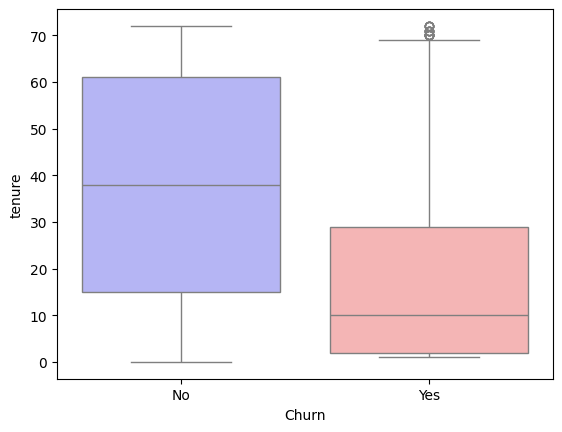

In [11]:
sns.boxplot(x = data1.Churn, y = data1.tenure, palette='bwr')

C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\3318561897.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data1.MonthlyCharges[(data1["Churn"] == "No") ],
C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\3318561897.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data1.MonthlyCharges[(data1["Churn"] == "Yes") ],


Text(0.5, 1.0, 'Monthly charges by churn')

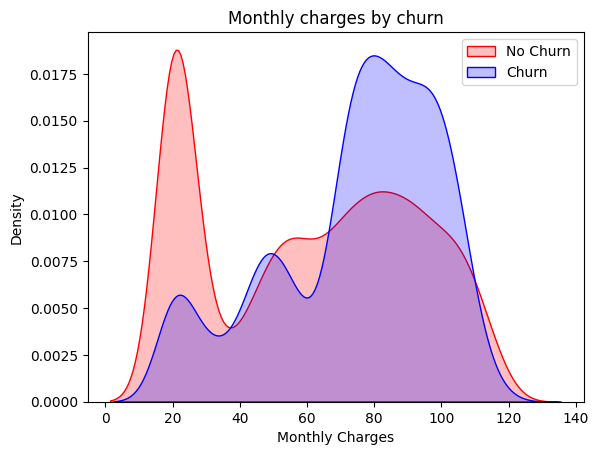

In [12]:
Mth = sns.kdeplot(data1.MonthlyCharges[(data1["Churn"] == "No") ],
                color="Red", shade = True)
Mth = sns.kdeplot(data1.MonthlyCharges[(data1["Churn"] == "Yes") ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\2649240480.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "No") ],
C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\2649240480.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "Yes") ],


Text(0.5, 1.0, 'Total charges by churn')

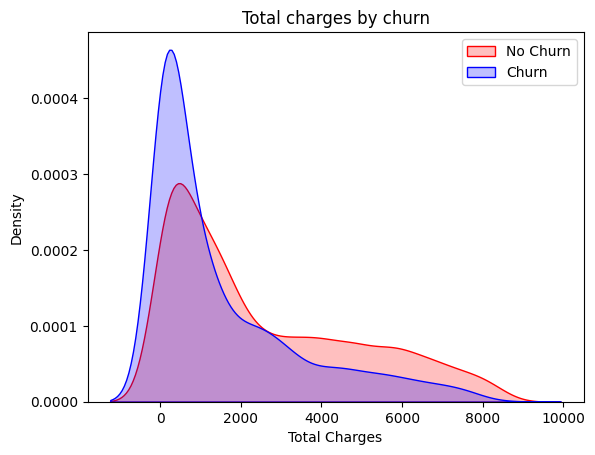

In [13]:
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "No") ],
                color="Red", shade = True)
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "Yes") ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\2649240480.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "No") ],
C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\2649240480.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "Yes") ],


Text(0.5, 1.0, 'Total charges by churn')

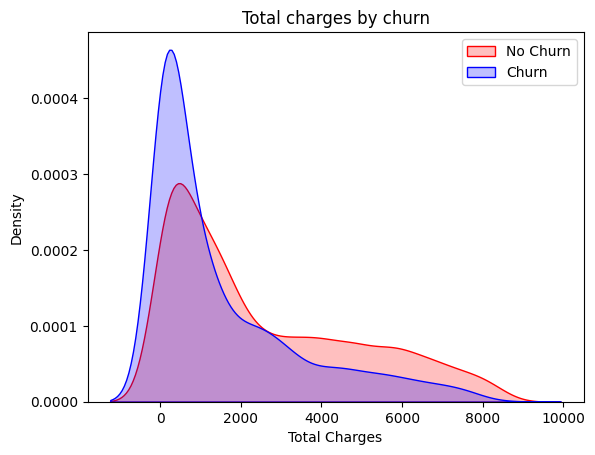

In [14]:
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "No") ],
                color="Red", shade = True)
Tot = sns.kdeplot(data1.TotalCharges[(data1["Churn"] == "Yes") ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

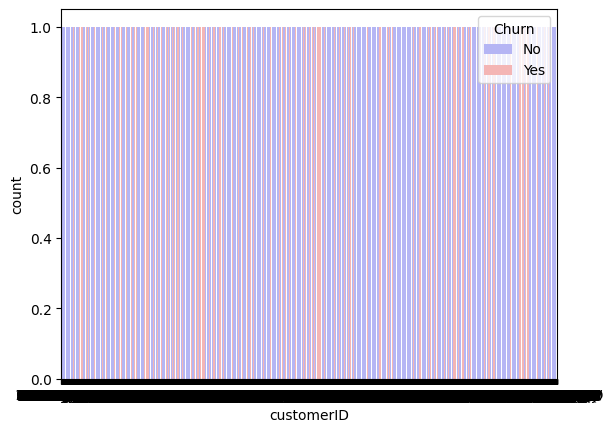

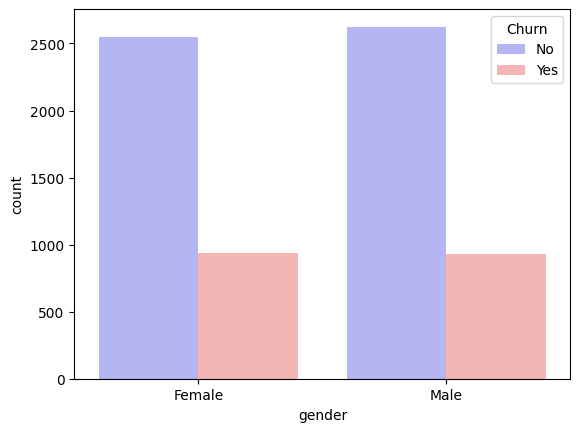

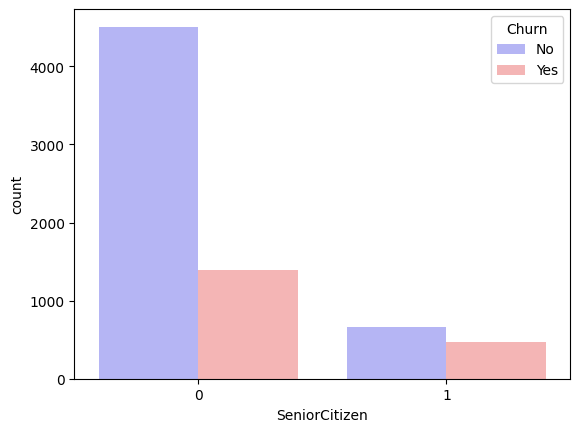

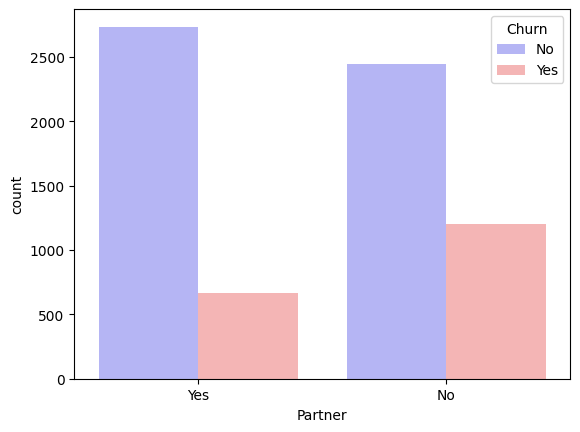

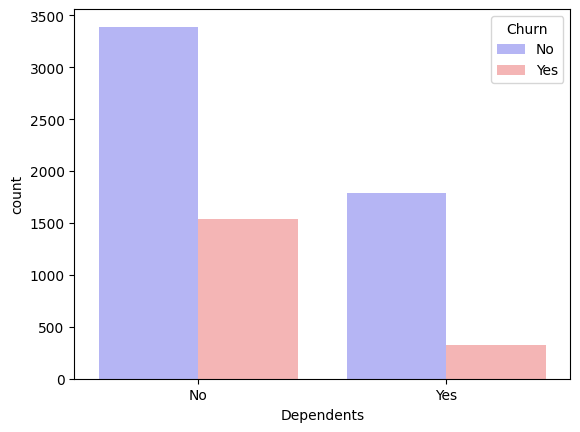

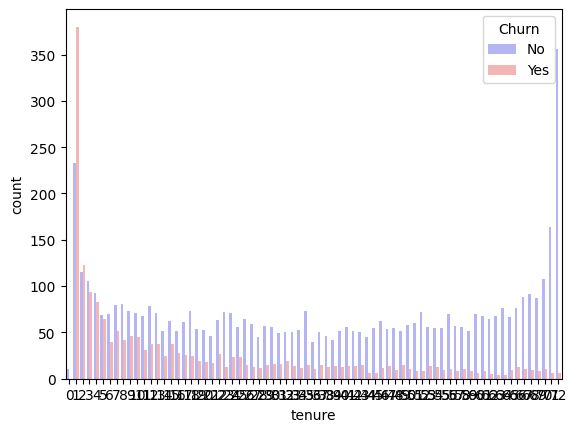

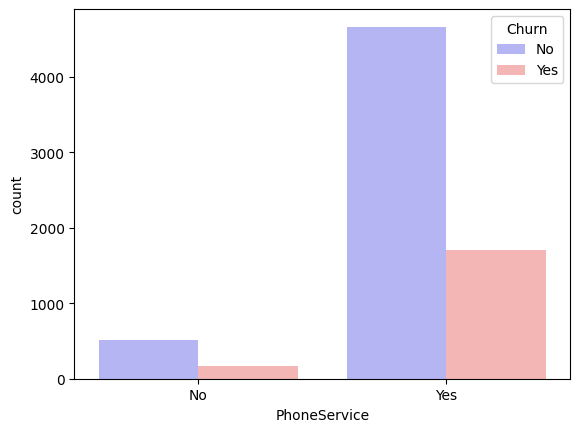

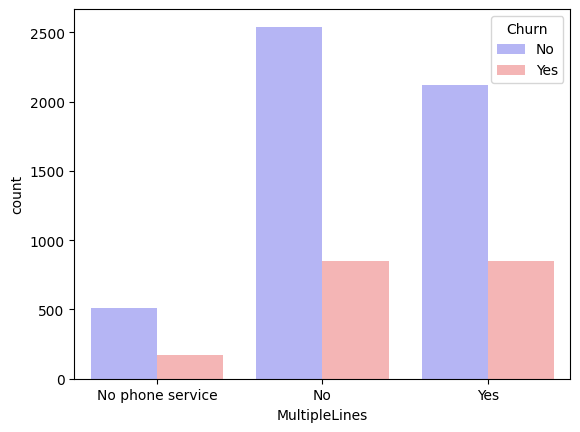

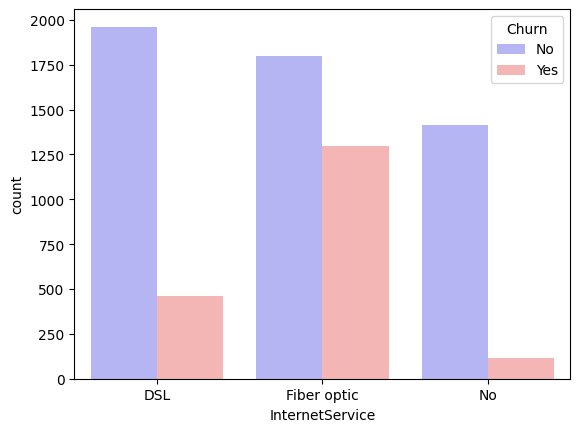

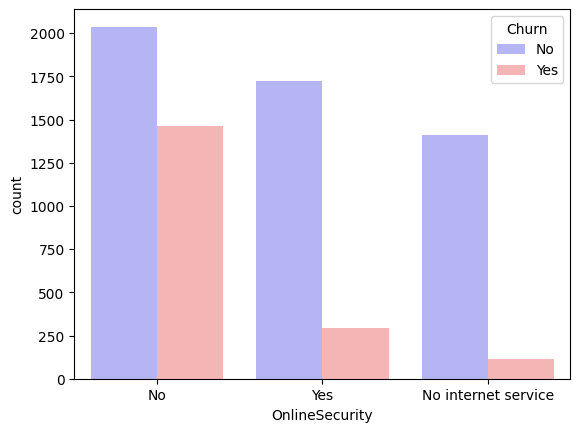

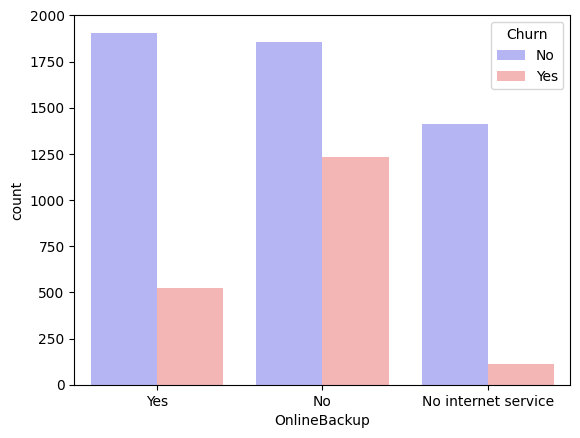

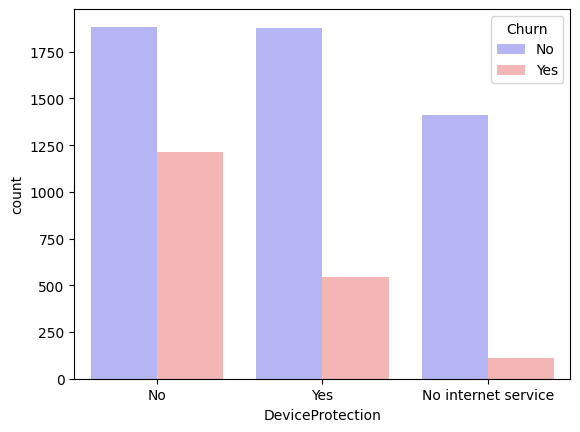

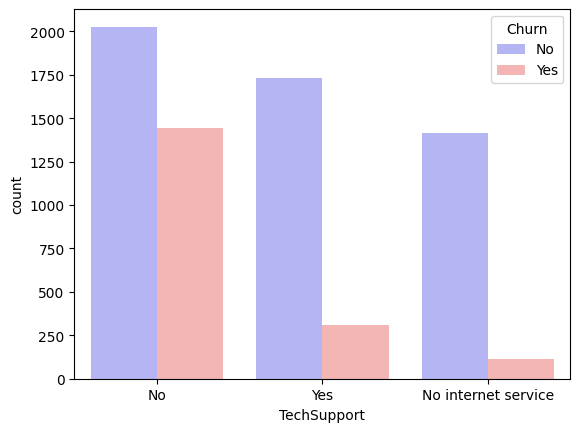

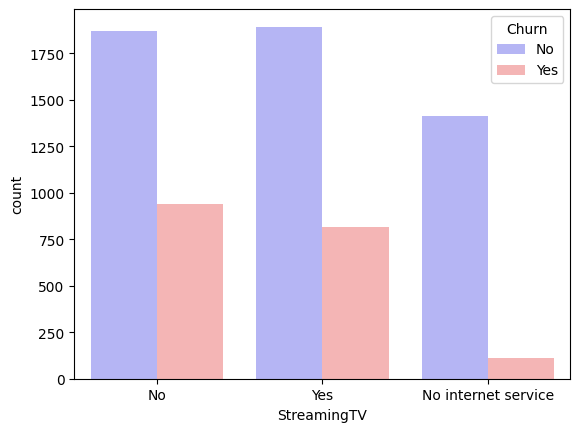

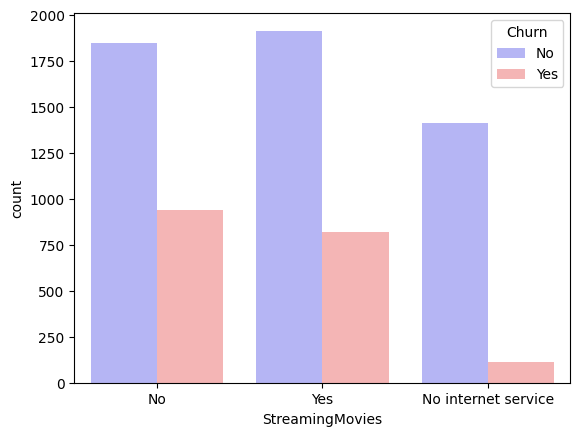

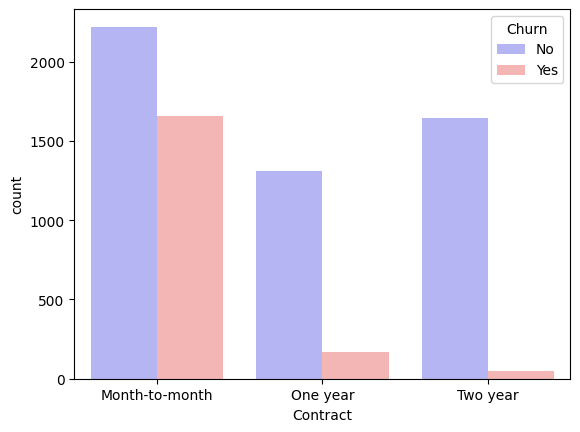

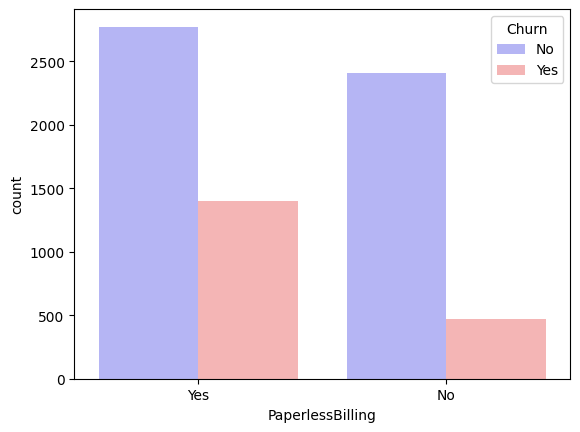

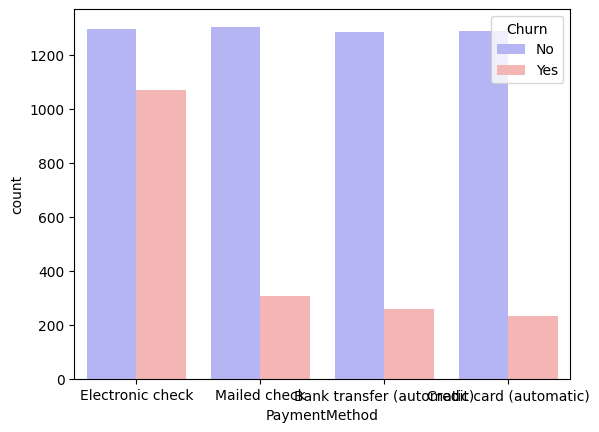

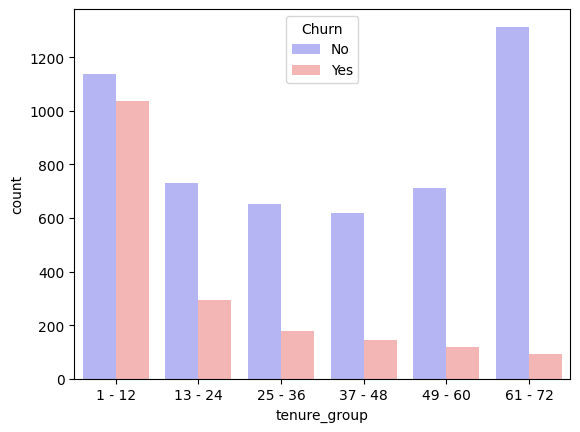

In [16]:
list = enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']))
lst=[]
for i, predictor in list:
    plt.figure(i)
    lst.append(sns.countplot(data=data, x=predictor, hue='Churn',palette='bwr'))
plt.show()

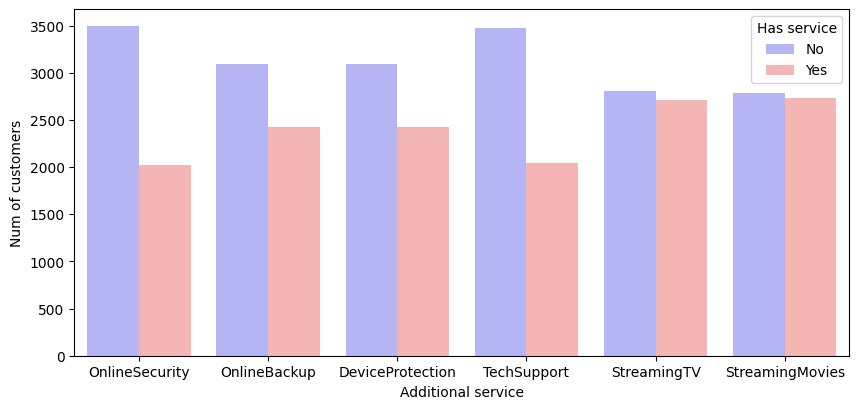

In [17]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
data1 = pd.melt(data1[data1["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=data1, x='variable', hue='Has service', palette="bwr")
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

#additional internet services like online security, online backup, device protection, tech support are not
#preferred by many users but user who have opted for these services show high retention rate from the above graphs
#hence the company has to focus on advertising these services to its customers to decrease the customer churn rate

In [57]:
data= data.drop(columns=['customerID'])

In [58]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,True,False,False,True,True,False,...,True,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,True,True,False,False,False,True,False,False,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,True,False,False,True,True,False,False,False,False,False


In [60]:
telco_data = data_dummies.copy()
telco_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,True,False,False,True,True,False,...,True,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,True,True,False,False,False,True,False,False,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,True,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,False,True,False,True,False,True,...,False,True,True,False,False,True,False,False,False,False
7039,0,72,103.20,7362.90,True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,True,False,True,False,True,False,False,False,False,False
7041,1,4,74.40,306.60,False,True,False,True,True,False,...,False,True,False,True,True,False,False,False,False,False


In [61]:
telco_data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [62]:
input = telco_data.drop(['Churn_No','Churn_Yes'],axis=1)
input

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,False,False
7039,0,72,103.20,7362.90,True,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False
7041,1,4,74.40,306.60,False,True,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False


In [63]:
output= data['Churn'].replace({'No': 0,'Yes': 1})
output

C:\Users\reddy\AppData\Local\Temp\ipykernel_8348\3488134974.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  output= data['Churn'].replace({'No': 0,'Yes': 1})


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [64]:
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.2)

In [65]:
#before smoteenn
#DT
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(input_train,output_train)
output_pred = dt.predict(input_test)
dt.score(input_test,output_test)


0.7877927608232789

In [66]:
print(classification_report(output_test, output_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1050
           1       0.59      0.55      0.57       359

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [67]:
#RF
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf.fit(input_train,output_train)
output_pred=rf.predict(input_test)
rf.score(input_test,output_test)


0.8090844570617459

In [68]:
print(classification_report(output_test, output_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1050
           1       0.67      0.49      0.57       359

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [69]:
#after smoteenn
sm = SMOTEENN()
input_resampled, output_resampled = sm.fit_resample(input,output)
ir_train,ir_test,or_train,or_test=train_test_split(input_resampled, output_resampled,test_size=0.2)

In [70]:
dt_s=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt_s.fit(ir_train,or_train)
or_predict = dt_s.predict(ir_test)
model_score_r = dt_s.score(ir_test, or_test)
print(model_score_r)

0.94843617920541


In [71]:
print(classification_report(or_test, or_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       546
           1       0.94      0.96      0.95       637

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183



In [72]:
rf_s=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf_s.fit(ir_train,or_train)
or_predict = rf_s.predict(ir_test)
model_score_r1 = rf_s.score(ir_test, or_test)
print(model_score_r1)

0.9433643279797126


In [73]:
print(classification_report(or_test, or_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       546
           1       0.93      0.96      0.95       637

    accuracy                           0.94      1183
   macro avg       0.94      0.94      0.94      1183
weighted avg       0.94      0.94      0.94      1183



In [40]:
filename = 'model.sav'
pickle.dump(rf_s,open(filename,'wb'))

In [ ]:
load_model = pickle.load(open(filename,'rb'))
model_score_r1 = load_model.score(ir_test, or_test)
model_score_r1


0.7986633249791144

In [76]:
import tensorflow as tf
from tensorflow import keras

In [79]:
model =  keras.Sequential([
    keras.layers.Dense(22, input_shape=(51,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(input_train, output_train, epochs=100)

Epoch 1/100


c:\Users\reddy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6912 - loss: 57.4228  
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7180 - loss: 1.2411  
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7578 - loss: 0.7116  
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - loss: 0.7427  
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.7685 - loss: 0.6671
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7629 - loss: 0.7578
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7607 - loss: 0.6953  
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7673 - loss: 0.6874
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7585 - loss: 0.7286  
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7664 - loss: 0.6652  
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7660 - loss: 0.7468  
Epoch 12/100
177/177 ━━━━━━━━━━━━━

In [80]:
model.evaluate(input_test, output_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7982 - loss: 0.4393  


[0.4434940814971924, 0.8105039000511169]

In [81]:
yp = model.predict(input_test)
yp[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.2365209e-01],
       [2.2220816e-03],
       [3.2321151e-04],
       [7.2848749e-01],
       [4.3652140e-04]], dtype=float32)